[ 4.44089210e-16 -2.85882429e-15  1.74860126e-15  2.29261055e-14
  6.80011603e-16 -3.74700271e-15 -1.71737624e-16  3.02709247e-16
  8.94466792e-19 -2.54787511e-18]


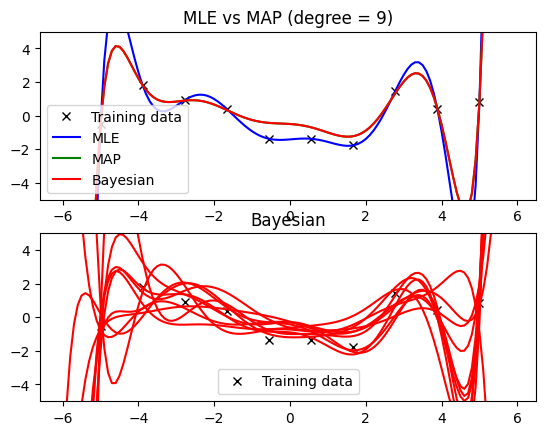

In [6]:
'''
Linear Regression with MLE, MAP, Bayesian.
'''

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def make_dataset(num_of_data):
    ###
    # Make (x,y) data s.t. -5<=x<=5, -2<=y<=2
    ###
    return np.linspace(-5, 5, num_of_data), np.random.uniform(-2,2,num_of_data)

def nonlinearize_x(x_data, degree):
    num_of_data = len(x_data)
    phi_x = np.zeros((num_of_data, degree + 1))
    for i,x in enumerate(x_data):
        phi_x[i] = np.array([x**j for j in range(degree + 1)])
    
    return phi_x

def MLE(data):
    phi_X, Y = data
    return np.linalg.pinv(phi_X)@Y

def MAP(data, noise_variance, prior_variance):
    ##
    # Actually I assumed 'prior_mean = 0'. You have to fix this function to generalize it with non-zero prior mean.
    ##
    phi_X, Y = data
    return np.linalg.inv(phi_X.T@phi_X + noise_variance * np.linalg.inv(prior_variance)) @ phi_X.T @ Y

def Bayesian(training_data, noise_variance, prior_mean, prior_variance, num_of_theta_bayesian):
    phi_X, Y = training_data
    s = np.linalg.inv(np.linalg.inv(prior_variance) + noise_variance ** (-2) * phi_X.T @ phi_X)
    m = s @ (np.linalg.inv(prior_variance) @ prior_mean + noise_variance ** (-2) * phi_X.T @ Y)
    return np.random.multivariate_normal(m,s,num_of_theta_bayesian), m

def main():
    N = 10
    degree = 9
    num_of_theta_bayesian = 10 # the number of bayesian linear regression models

    ## Assume theta ~ N(0, 1/4 * I), noise variance sigma^2 = 1
    noise_variance = 1
    prior_mean = np.zeros(degree + 1)
    prior_variance = 0.25 * np.identity(degree + 1)

    Xdata, Ydata = make_dataset(N)
    phi_X = nonlinearize_x(Xdata, degree)

    theta_MLE = MLE((phi_X, Ydata))
    theta_MAP = MAP((phi_X, Ydata), noise_variance, prior_variance)
    theta_bayesian, m_bayesian = Bayesian((phi_X, Ydata), noise_variance, prior_mean, prior_variance, num_of_theta_bayesian)
    x = np.arange(-6, 6, 0.1) # for plotting
    for_plot_x = nonlinearize_x(x, degree)
    plt.subplot(2, 1, 1)
    plt.plot(Xdata, Ydata, 'kx', label = 'Training data')
    plt.plot(x, for_plot_x @ theta_MLE,'b', label = 'MLE')
    plt.plot(x, for_plot_x @ theta_MAP,'g', label = 'MAP')
    # plt.plot(x, for_plot_x @ m_bayesian,'r', label = 'Bayesian')
    # print(theta_MAP - m_bayesian) # Check whether MAP and 
    plt.ylim([-5,5])
    plt.legend()
    plt.title('MLE vs MAP (degree = 9)')
    
    plt.subplot(2, 1, 2)
    plt.plot(Xdata, Ydata, 'kx', label = 'Training data')
    for i in range(num_of_theta_bayesian):
        plt.plot(x, for_plot_x @ theta_bayesian[i], 'r')
    plt.ylim([-5,5])
    plt.legend()
    plt.title('Bayesian')
    plt.show()


if __name__ == "__main__":
    main()